In [11]:
!touch inference_log.txt

In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
import logging
logging.basicConfig(level = logging.INFO)

from detectron2.utils.logger import setup_logger
setup_logger()

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# import some common libraries
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt


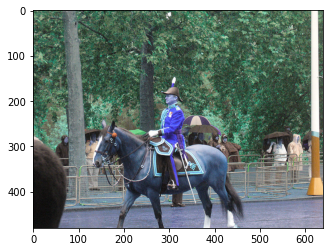

In [2]:
# Load image
im = cv2.imread("input.jpg")
plt.imshow(im)
plt.show();

INFO:fvcore.common.checkpoint:Loading checkpoint from mask_rcnn_R_50_FPN_3x_model_final_f10217.pkl
INFO:fvcore.common.checkpoint:Reading a file from 'Detectron2 Model Zoo'


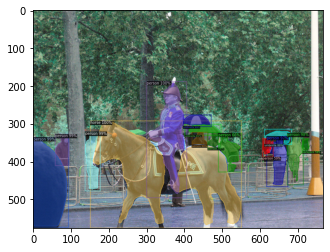

In [4]:
# create config and predictor
cfg = get_cfg()


# add project-specific config (e.g., TensorMask) 
# here if you're not running a model in detectron2's core library
cfg.merge_from_file(
    model_zoo.get_config_file(
        "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

# set threshold for this model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  

# Find a model from detectron2's model zoo. 
# You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
#      "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.MODEL.WEIGHTS = "mask_rcnn_R_50_FPN_3x_model_final_f10217.pkl"

predictor = DefaultPredictor(cfg)
outputs = predictor(im)

# look at the outputs. 
# See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format 
# for specification
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], 
               MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), 
               scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :, ::-1])
plt.show();

In [21]:
cfg.MODEL.WEIGHTS

'https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'

In [22]:
!wget https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl

--2020-04-08 10:11:22--  https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 104.22.75.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177841981 (170M) [application/octet-stream]
Saving to: ‘model_final_f10217.pkl’

model_final_f10217. 100%[===================>] 169.60M  15.3MB/s    in 11s     

2020-04-08 10:11:35 (14.9 MB/s) - ‘model_final_f10217.pkl’ saved [177841981/177841981]



In [24]:
!mv model_final_f10217.pkl mask_rcnn_R_50_FPN_3x_model_final_f10217.pkl